# House Prices: Advanced Regression Techniques


### Objectifs:

### Résultats attendus :

### Importation les bibliothèques nécessaires

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [60]:
# Définition de la fonction pour évaluer les modèles
def rmlse(y_pred, y_true):
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


### Chargement des données:

In [107]:
print("Chargement des données...")
data = pd.read_csv("train.csv")

Chargement des données...


In [109]:
# Affichage des données pour vérification
print("Données d'entraînement :")
print(data.head())


Données d'entraînement :
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePric

### Nettoyage et Prétraitement des données


In [112]:
# Identifier les colonnes avec des valeurs manquantes
colonnes_manquantes = data.isnull().sum()
colonnes_manquantes = colonnes_manquantes[colonnes_manquantes > 0].sort_values(ascending=False)
print("Colonnes avec des valeurs manquantes :")
print(colonnes_manquantes)

Colonnes avec des valeurs manquantes :
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [114]:
# Remplir les valeurs manquantes
for colonne in colonnes_manquantes.index:
    if data[colonne].dtype == "object":
        data[colonne] = data[colonne].fillna("None")
    else:
        data[colonne] = data[colonne].fillna(0)


In [116]:
# Encoder les variables catégoriques
data = pd.get_dummies(data, drop_first=True)

In [118]:
# Transformation du variable cible
data["SalePrice"] = np.log1p(data["SalePrice"])

In [120]:
# Sélection des variables indépendantes (X) et de la variable cible (y)
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]


In [122]:
# Division en jeu d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Analyse exploratoire et Visualisation

Analyse exploratoire...


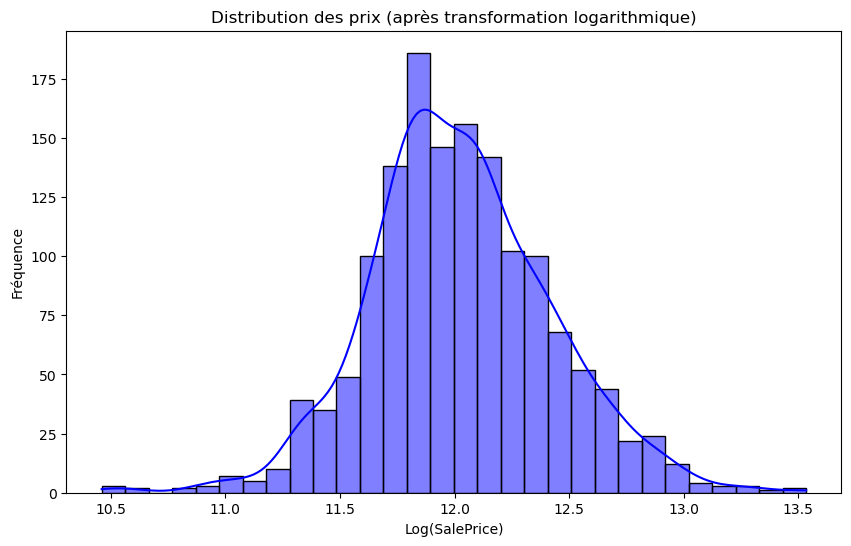

In [125]:
print("Analyse exploratoire...")
plt.figure(figsize=(10, 6))
sns.histplot(data["SalePrice"], kde=True, color="blue", bins=30)
plt.title("Distribution des prix (après transformation logarithmique)")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Fréquence")
plt.show()

### Modeles

In [128]:
# Modèle Random Forest
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = np.expm1(rf.predict(X_val))
rmlse_rf = rmlse(y_pred_rf, np.expm1(y_val))
print(f"Performance du modèle Random Forest : RMLSE = {rmlse_rf:.4f}")

Performance du modèle Random Forest : RMLSE = 0.1489


In [129]:
# Modèle XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=340, max_depth=2, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = np.expm1(xgb_model.predict(X_val))
rmlse_xgb = rmlse(y_pred_xgb, np.expm1(y_val))
print(f"Performance du modèle XGBoost : RMLSE = {rmlse_xgb:.4f}")

Performance du modèle XGBoost : RMLSE = 0.1380


### Conclusion